# Bunching

Bunching at some wavelength $\lambda$ for a list of particles $z$ is given by the weighted sum of complex phasors:

$$B(z, \lambda) \equiv \frac{\sum_j w_j e^{i k z_j}}{\sum w_j}
$$

where $k = 2\pi/\lambda$ and $w_j$ are the weights of the particles.

See for example [D. Ratner's disseratation](https://www.osti.gov/servlets/purl/1443197). 

## Add bunching to particles

This uses a simple method to add perfect bunching at 0.1 µm

In [1]:
from pmd_beamphysics import ParticleGroup
%config InlineBackend.figure_format = 'retina'

In [2]:
P = ParticleGroup( 'data/bmad_particles2.h5')
P.drift_to_t()

wavelength = 0.1e-6
dz = (P.z/wavelength % 1) * wavelength
P.z -= dz

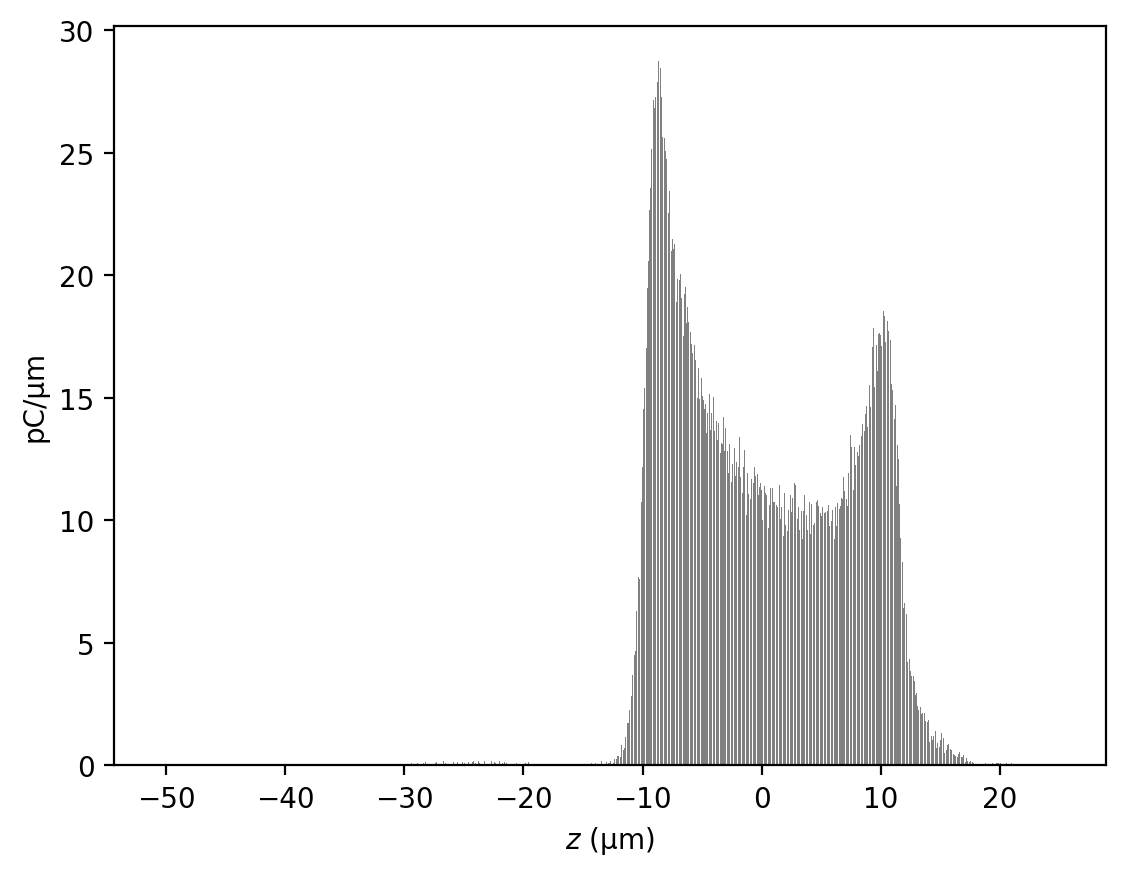

In [3]:
P.plot('z')

## Calculate bunching

All of these methods will calculate the bunching. The first returns a complex number `bunching`

The string attributes return real numbers, magnitude and argument (phase):

- `'bunching_` returns `np.abs(bunching)`
- `'bunching_phase_` returns `np.angle(bunching)`


In [4]:
b = P.bunching(wavelength)
b

(1-3.2133096564432656e-16j)

In [5]:
P['bunching_0.1e-6']

1.0

In [6]:
P['bunching_phase_0.1e-6']

-3.2133096564432656e-16

In [7]:
P['bunching_0.1_um']

1.0

# Simple plot

In [8]:
import numpy as np

import matplotlib.pyplot as plt


In [9]:
wavelengths = wavelength * np.linspace(0.9, 1.1, 200)

Text(0, 0.5, 'bunching')

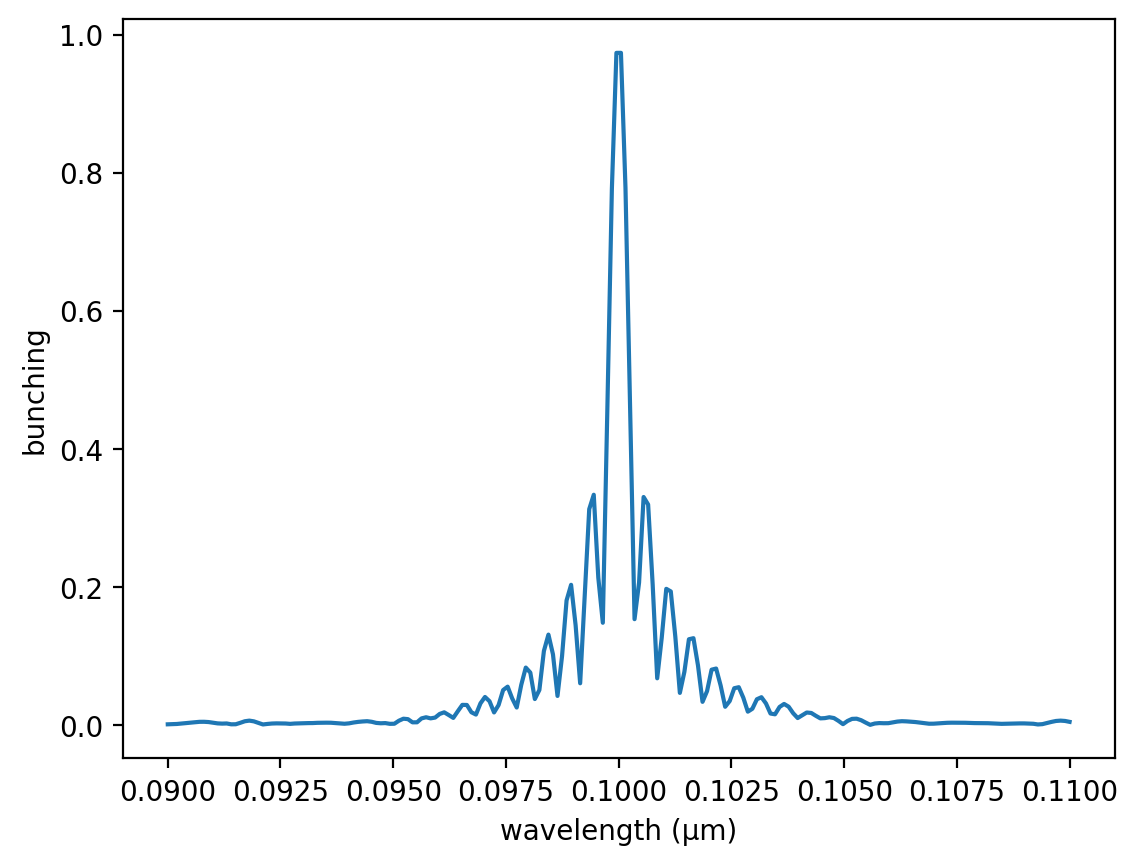

In [10]:
plt.plot(wavelengths*1e6, np.abs(list(map(P.bunching, wavelengths))))
plt.xlabel('wavelength (µm)')
plt.ylabel('bunching')

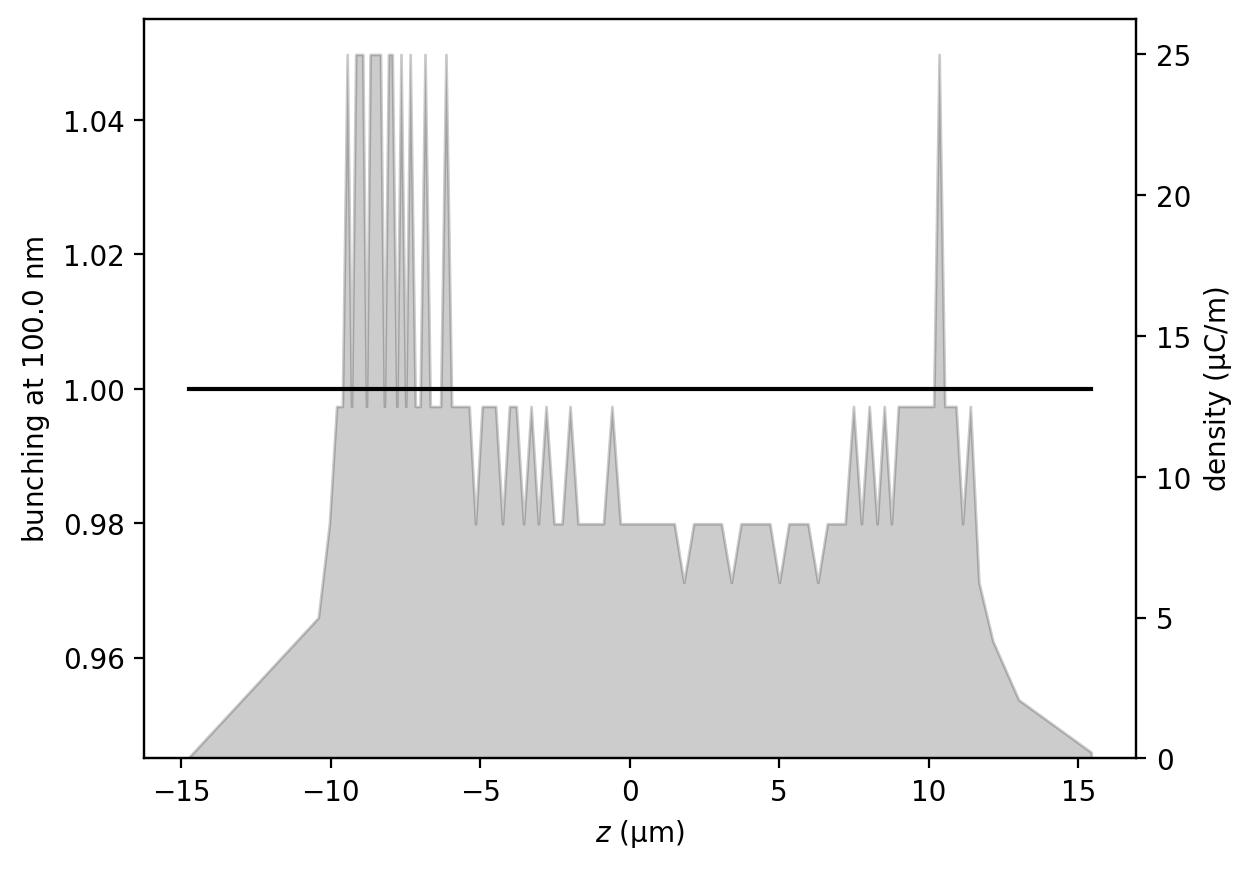

In [11]:
P.slice_plot('bunching_0.1_um')

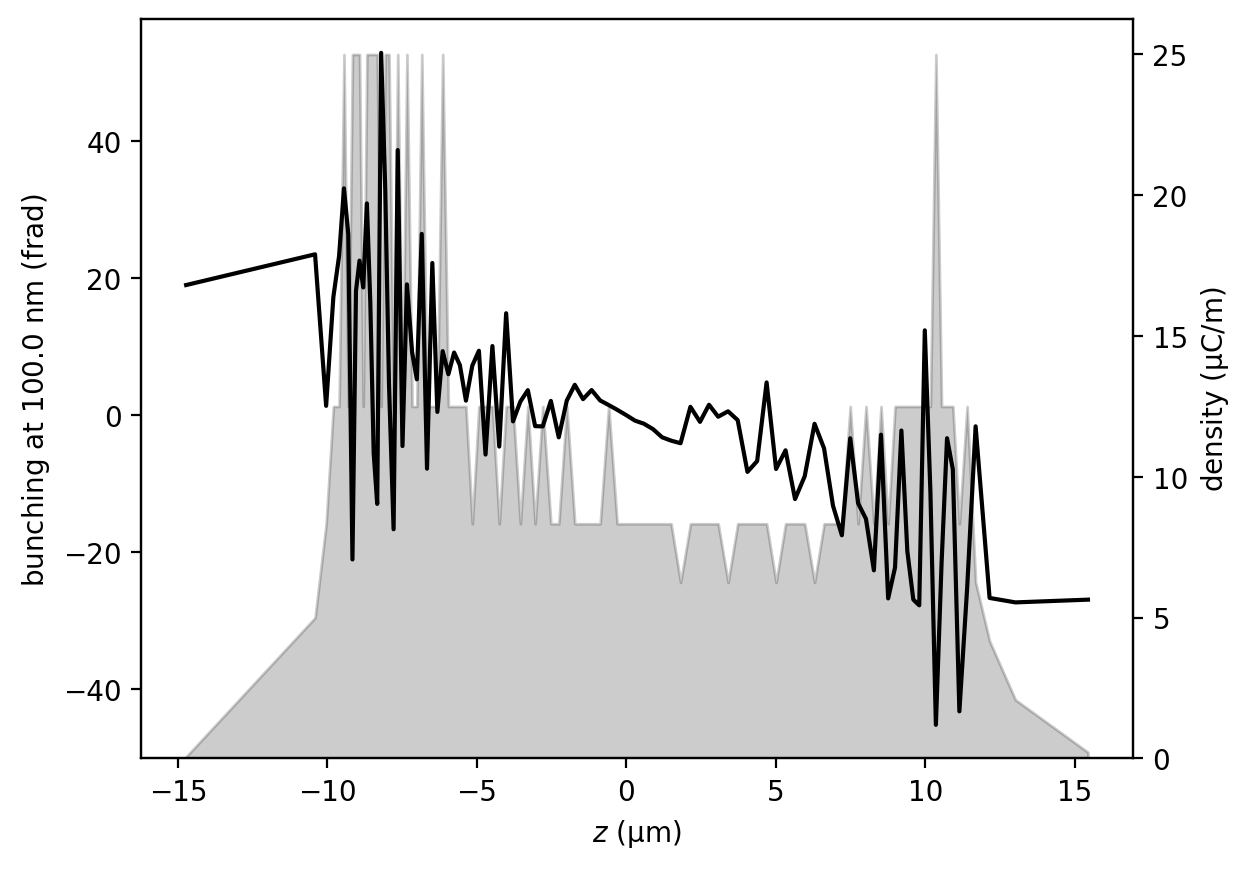

In [12]:
P.slice_plot('bunching_phase_0.1_um')

In [13]:
P.in_z_coordinates

False

## Units

Bunching is dimensionless

In [14]:
P.units('bunching_0.1_um')

pmd_unit('', 1, (0, 0, 0, 0, 0, 0, 0))

In [15]:
P.units('bunching_phase_0.1_um')

pmd_unit('rad', 1, (0, 0, 0, 0, 0, 0, 0))

## Bunching function

This is the function that is used.

In [16]:
from pmd_beamphysics.statistics import bunching

In [17]:
?bunching